# Selecting a performance measure

We are working on the bank dataset, which includes both categorical and numerical features. For that reason we need a custom error function, we combine the cross-entropy loss for categorical columns and RMSE for numerical columns, weighted by the ratio of the number of columns for each type. Our error function is: $$ E = w_{\text{cat}} \cdot CE + w_{\text{num}} \cdot RMSE $$
<br>
Where:
- $w_{\text{cat}} = \frac{n_{\text{cat}}}{n_{\text{cat}} + n_{\text{num}}}$
- $w_{\text{num}} = \frac{n_{\text{num}}}{n_{\text{cat}} + n_{\text{num}}}$
- $n_{\text{cat}} = \text{Number of categorical columns}$
- $n_{\text{num}} = \text{Number of numerical columns}$
<br>
And:
- $\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2}$
- $\text{CE} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{k=1}^{K} y_{i,k} \log(\hat{y}_{i,k})$
- $y_i = \text{True value for the } i\text{-th data point (numerical)}$
- $\hat{y}_i = \text{Imputed (predicted) value for the } i\text{-th data point (numerical)}$
- $N = \text{Number of missing values (numerical or categorical)}$
- $y_{i,k} = \text{One-hot encoded true value for the } i\text{-th data point and } k\text{-th class}$
- $\hat{y}_{i,k} = \text{Predicted probability for the } k\text{-th class for the } i\text{-th data point}$
- $K = \text{Number of classes for the categorical column.}$

# Download the data

In [29]:
import pandas as pd

bank_df = pd.read_csv("./data/bank-full.csv", sep=";")

# Take a quick look at the Data

In [30]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [31]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [32]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


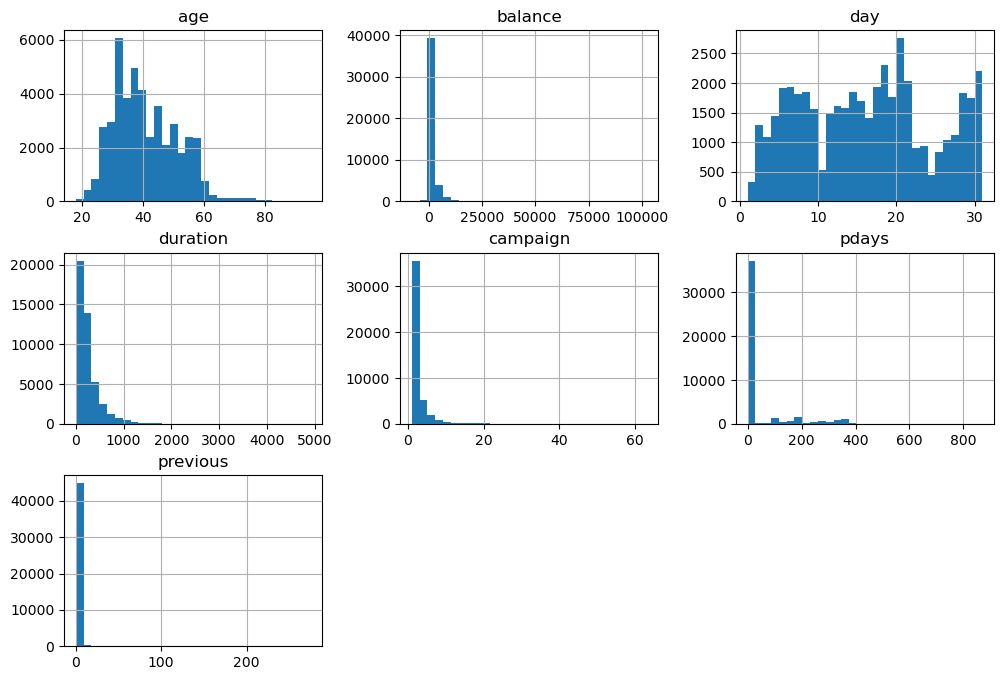

In [33]:
import matplotlib.pyplot as plt

bank_df.hist(bins=30, figsize=(12,8))
plt.show()

# Create a Test Set

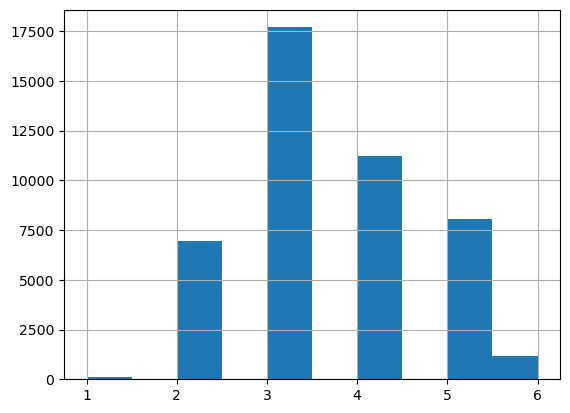

In [34]:
import numpy as np

bank_df["Age_cat"] = pd.cut(bank_df["age"],
                            bins=[10, 20, 30, 40, 50, 60, np.inf],
                            labels=[1, 2, 3, 4, 5, 6])

bank_df.Age_cat.hist(bins=10)
plt.show()

In [35]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(bank_df, test_size=0.1, stratify=bank_df["Age_cat"], random_state=42)

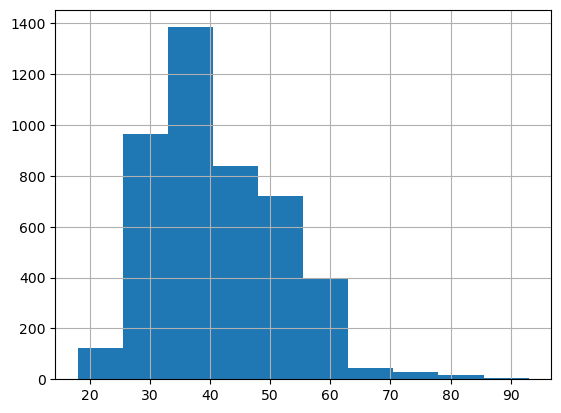

In [36]:
test_set["age"].hist()
plt.show()

In [37]:
# Drop Age_cat column because we won't use it again
for set_ in (train_set, test_set):
    set_.drop(["Age_cat", "y"], axis=1, inplace=True)

In [38]:
train_set_clean = train_set.copy()

In [39]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40689 entries, 14995 to 34504
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40689 non-null  int64 
 1   job        40689 non-null  object
 2   marital    40689 non-null  object
 3   education  40689 non-null  object
 4   default    40689 non-null  object
 5   balance    40689 non-null  int64 
 6   housing    40689 non-null  object
 7   loan       40689 non-null  object
 8   contact    40689 non-null  object
 9   day        40689 non-null  int64 
 10  month      40689 non-null  object
 11  duration   40689 non-null  int64 
 12  campaign   40689 non-null  int64 
 13  pdays      40689 non-null  int64 
 14  previous   40689 non-null  int64 
 15  poutcome   40689 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.3+ MB


In [40]:
from gain_utils import missing_method

train_set_missing, mask = missing_method(train_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)
train_set_missing

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
14995,37,blue-collar,married,secondary,no,-26.0,no,no,telephone,17.0,NaN,209.0,2.0,-1,0,unknown
36599,37,blue-collar,married,primary,no,-106.0,yes,yes,cellular,12.0,may,690.0,1.0,-1,0,unknown
40611,61,retired,married,secondary,no,NaN,no,no,cellular,4.0,NaN,219.0,1.0,-1,0,unknown
17323,32,technician,single,tertiary,no,849.0,yes,no,cellular,28.0,NaN,289.0,5.0,-1,0,unknown
34603,32,management,single,tertiary,NaN,11.0,yes,yes,cellular,5.0,may,399.0,1.0,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15874,38,NaN,married,primary,no,-175.0,yes,no,telephone,21.0,NaN,86.0,9.0,-1,0,unknown
7167,53,blue-collar,married,primary,no,436.0,yes,no,unknown,29.0,may,154.0,1.0,-1,0,unknown
23989,42,technician,married,unknown,no,-401.0,yes,no,telephone,29.0,aug,145.0,2.0,-1,0,unknown
36211,48,blue-collar,married,primary,no,1080.0,yes,no,cellular,11.0,may,197.0,2.0,-1,0,unknown


# Prepare Data for ML algorithms

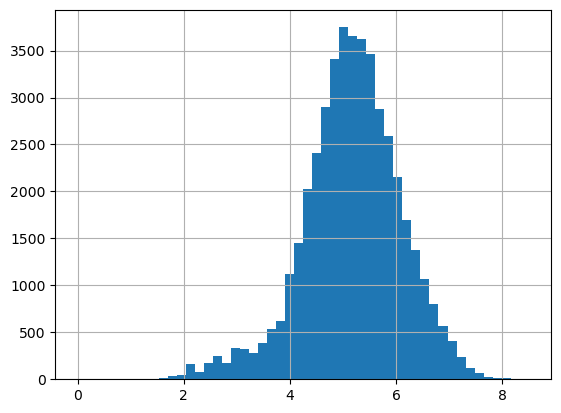

In [41]:
# normalize duration column using log transformation
import numpy as np
bank_df["duration"] = np.log(bank_df["duration"]+1)
bank_df["duration"].hist(bins=50)
plt.show()

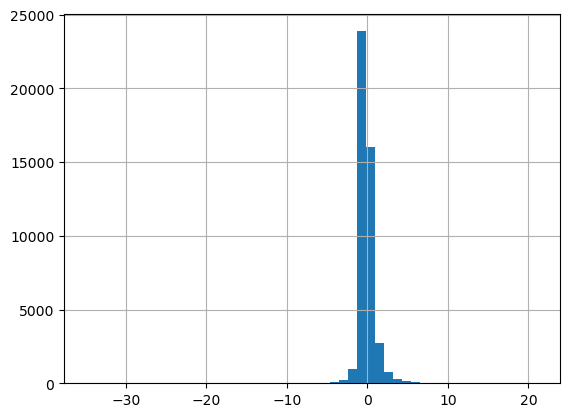

In [42]:
from sklearn.preprocessing import PowerTransformer

# normalize balance column using Yeo-Johnson transformation
pt = PowerTransformer(method='yeo-johnson')
bank_df['balance'] = pt.fit_transform(bank_df[['balance']])

# Plot the transformed balance column
bank_df['balance'].hist(bins=50)
plt.show()

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline

numerical_cols = ["age", "balance", "duration", "campaign", "pdays", "previous"]
nominal_cols = ["job", "marital", "default", "housing", "loan", "contact", "poutcome"]
ordinal_cols = ["education", "month"]

log_transformer = FunctionTransformer(lambda x: np.log1p(np.maximum(x, 0) + 1e-9), validate=True)
pt = FunctionTransformer(lambda x: PowerTransformer(method='yeo-johnson').fit_transform(x), validate=True)

nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('log_transform', log_transformer, ['duration']),
        ('pt', pt, ['balance']),
        ('scaler', StandardScaler(), ["age", "campaign", "pdays", "previous"]),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ])

preprocessed_train_set = preprocessor.fit_transform(train_set)
pd.DataFrame(preprocessed_train_set).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40689 entries, 0 to 40688
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       40689 non-null  float64
 1   1       40689 non-null  float64
 2   2       40689 non-null  float64
 3   3       40689 non-null  float64
 4   4       40689 non-null  float64
 5   5       40689 non-null  float64
 6   6       40689 non-null  float64
 7   7       40689 non-null  float64
 8   8       40689 non-null  float64
 9   9       40689 non-null  float64
 10  10      40689 non-null  float64
 11  11      40689 non-null  float64
 12  12      40689 non-null  float64
 13  13      40689 non-null  float64
 14  14      40689 non-null  float64
 15  15      40689 non-null  float64
 16  16      40689 non-null  float64
 17  17      40689 non-null  float64
 18  18      40689 non-null  float64
 19  19      40689 non-null  float64
 20  20      40689 non-null  float64
 21  21      40689 non-null  float64
 22

In [44]:
from gain_utils import missing_method

preprocessed_train_set_missing, mask = missing_method(preprocessed_train_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)
preprocessed_train_set_missing

array([[ 5.34710753, -0.47721673, -0.36997525, ...,  0.        ,
         0.        ,  1.        ],
       [ 6.53813982,         nan, -0.36997525, ...,  0.        ,
         0.        ,  1.        ],
       [        nan, -0.15449785,  1.88915802, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 4.98360662,         nan,  0.10067752, ...,  0.        ,
         0.        ,  1.        ],
       [ 5.28826703,  0.04401817,  0.66546084, ...,  0.        ,
         0.        ,  1.        ],
       [ 5.19849703, -0.43274223,  1.51263581, ...,  0.        ,
         0.        ,  1.        ]])

In [45]:
from improved_gain import GAINImputer
data_x = preprocessed_train_set_missing.copy()
gain_parameters = {
    'batch_size': 8,
    'hint_rate': 0.9,
    'alpha': 1,
    'iterations': 100
}

gain_imputer = GAINImputer(gain_parameters=gain_parameters)
imputed_data = gain_imputer.fit_transform(data_x)

  4%|▍         | 4/100 [00:03<01:08,  1.39it/s]

Iteration 1/100 - D_loss: 0.7733, G_loss: 1.7039, MSE_loss: 1.6692


100%|██████████| 100/100 [00:06<00:00, 15.27it/s]


In [46]:
from gain_utils import custom_imputation_error_onehot

mask = np.isnan(preprocessed_train_set_missing)

# Map original column types to processed indices
n_numerical = len(numerical_cols)
n_nominal = sum([len(train_set[col].unique()) for col in nominal_cols])  # One-hot encoding expands nominal columns
n_ordinal = len(ordinal_cols)

# Assign column ranges
numerical_indices = list(range(n_numerical))
ordinal_indices = list(range(n_numerical, n_numerical + n_ordinal))
nominal_indices = list(range(n_numerical + n_ordinal, n_numerical + n_ordinal + n_nominal))

# Build the onehot_indices dictionary
onehot_indices = {}
start = n_numerical + n_ordinal
for col in nominal_cols:
    n_classes = len(train_set[col].unique())
    onehot_indices[col] = list(range(start, start + n_classes))
    start += n_classes

# Define column types (categorical or numerical)
column_types = ['numerical'] * n_numerical + ['categorical'] * (n_nominal + n_ordinal)

# Calculate the error
error_metrics = custom_imputation_error_onehot(
    clean_data=preprocessed_train_set,
    imputed_data=imputed_data,
    missing_mask=mask,
    column_types=column_types,
    onehot_indices=onehot_indices
)

# Output results
print("Weighted Error:", error_metrics['weighted_error'])
print("Categorical Error (CE):", error_metrics['categorical_error'])
print("Numerical Error (RMSE):", error_metrics['numerical_error'])
print("Weights:", error_metrics['weights'])

Weighted Error: 0.5779319105561683
Categorical Error (CE): 0.06699659255940951
Numerical Error (RMSE): 3.1326085005399626
Weights: {'categorical': 0.8333333333333334, 'numerical': 0.16666666666666666}


c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(


In [47]:
preprocessed_test_set = preprocessor.transform(test_set)

In [48]:
preprocessed_test_set_missing, mask_test = missing_method(preprocessed_test_set, mechanism="mcar", method="random", missing_threshold=0.1, random_state=42)

In [49]:
imputed_test_set = gain_imputer.transform(preprocessed_test_set_missing)

In [50]:
# Calculate the error
error_metrics_test = custom_imputation_error_onehot(
    clean_data=preprocessed_test_set,
    imputed_data=imputed_test_set,
    missing_mask=mask_test,
    column_types=column_types,
    onehot_indices=onehot_indices
)

# Output results
print("Weighted Error:", error_metrics_test['weighted_error'])
print("Categorical Error (CE):", error_metrics_test['categorical_error'])
print("Numerical Error (RMSE):", error_metrics_test['numerical_error'])
print("Weights:", error_metrics_test['weights'])

Weighted Error: 0.27737109575313496
Categorical Error (CE): 0.10189797741477241
Numerical Error (RMSE): 1.1547366874449476
Weights: {'categorical': 0.8333333333333334, 'numerical': 0.16666666666666666}


c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill result in an error.
  warnings.warn(
c:\Users\imoua\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:2916: UserWarning: The y_pred values do not sum to one. Starting from 1.5 thiswill re